Let's go through the **DFT of the given signal**, applying a **window function**, and then discuss **window function realization** with **basic theory**.

---

## 🟩 Step-by-Step Breakdown

### 🔷 1. **Given Signal**

$$
x_n(t) = \sin(2\pi \cdot 1000t) + 0.5 \cdot \sin(2\pi \cdot 2000t + \frac{3\pi}{4})
$$

This is a **continuous-time signal** composed of:

* A 1 kHz sine wave
* A 2 kHz sine wave with a phase shift

### ✅ Sampling it:

To compute the **DFT**, you need to discretize it:

$$
x[n] = \sin(2\pi f_1 nT) + 0.5 \cdot \sin(2\pi f_2 nT + \frac{3\pi}{4})
$$

Let:

* $f_s = 8000$ Hz (Sampling Frequency)
* $T = \frac{1}{f_s}$
* $f_1 = 1000$ Hz, $f_2 = 2000$ Hz

So:

$$
x[n] = \sin\left(\frac{2\pi \cdot 1000}{8000} \cdot n\right) + 0.5 \cdot \sin\left(\frac{2\pi \cdot 2000}{8000} \cdot n + \frac{3\pi}{4}\right)
$$

---

### 🔷 2. **DFT Computation**

Take $N$ samples (e.g., $N = 64$, $N = 128$), and apply DFT:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}
$$

This gives frequency components between 0 and $f_s$. For real-valued signals, DFT is symmetric, and peaks will appear at **1 kHz** and **2 kHz** bins.

---

### 🔷 3. **Windowing (Why and How)**

#### ❓ Why use a window?

* Truncating a signal to finite $N$ samples causes **spectral leakage**.
* A **window function** (like Hamming, Hann, Blackman) tapers the ends to reduce leakage.

#### ✅ How to apply:

Let $w[n]$ be the window of size $N$.

Then apply:

$$
x_w[n] = x[n] \cdot w[n]
$$

Then compute the DFT of $x_w[n]$.

---

### 🔷 4. **Common Window Functions**

| Window      | Equation                                                          | Properties                               |
| ----------- | ----------------------------------------------------------------- | ---------------------------------------- |
| Rectangular | $w[n] = 1$                                                        | High leakage, sharpest resolution        |
| Hann        | $w[n] = 0.5 \left(1 - \cos\left(\frac{2\pi n}{N-1}\right)\right)$ | Good leakage control, wider main lobe    |
| Hamming     | $w[n] = 0.54 - 0.46\cos\left(\frac{2\pi n}{N-1}\right)$           | Lower side-lobes than Hann               |
| Blackman    | Uses more cosine terms for better suppression                     | Best leakage suppression, wide main lobe |




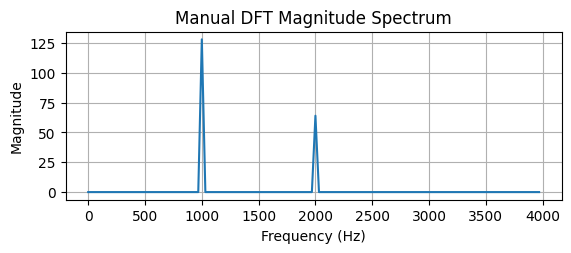

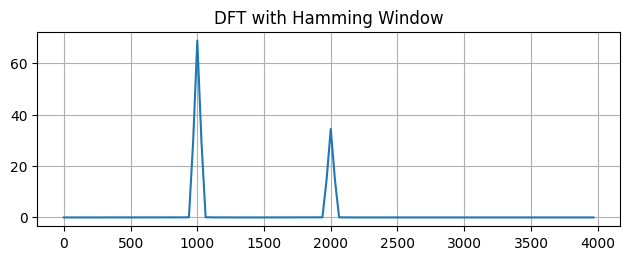

In [3]:

##  **Python Example (DFT with Window)**
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 8000
N = 256
n = np.arange(N)
f1 = 1000
f2 = 2000

# Signal
x = np.sin(2*np.pi*f1*n/fs) + 0.5*np.sin(2*np.pi*f2*n/fs + 3*np.pi/4)

# Window function (e.g., Hamming)
w = np.hamming(N)
x_w = x * w

# Compute DFTs
X = np.fft.fft(x)
Xw = np.fft.fft(x_w)

# Frequency axis
freq = np.fft.fftfreq(N, d=1/fs)

N = len(X)
half_N = N // 2

# Prepare x and y data manually
freq_values = []
mag_values = []

for i in range(half_N):
    freq_values.append(freq[i])
    mag = (X[i].real**2 + X[i].imag**2)**0.5  # Manual magnitude = sqrt(Re² + Im²)
    mag_values.append(mag)

# Now manually plot
plt.subplot(2,1,1)
plt.plot(freq_values, mag_values)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Manual DFT Magnitude Spectrum")
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.title("DFT with Hamming Window")
plt.plot(freq[:N//2], np.abs(Xw[:N//2]))
plt.grid()
plt.tight_layout()
plt.show()


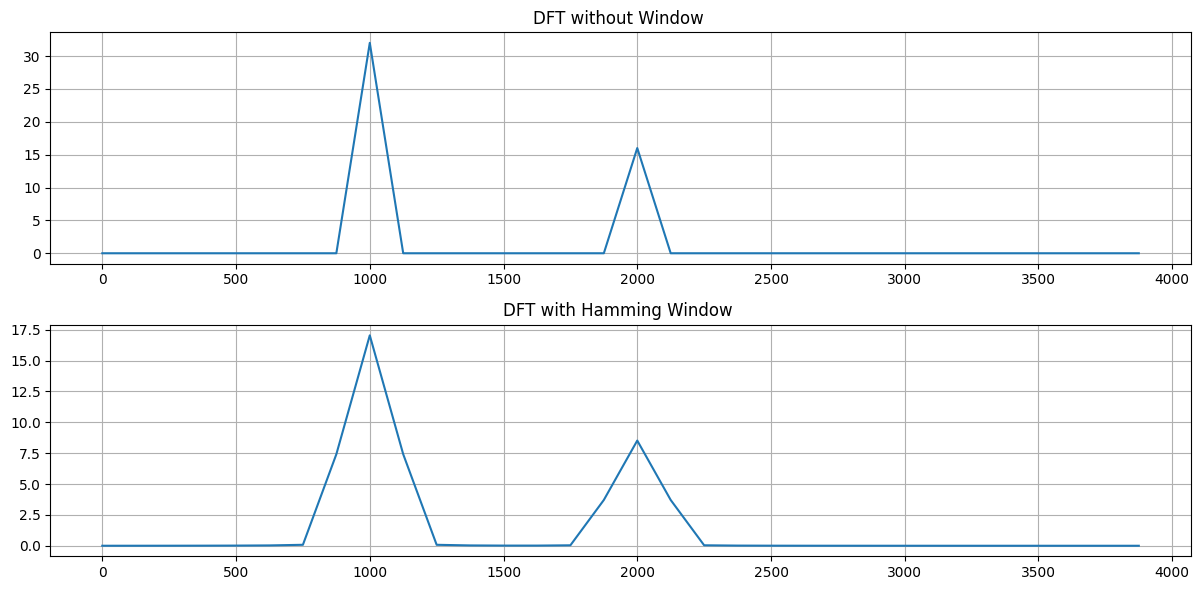

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Raw DFT Function ---
def dft(x):
    N = len(x)
    X = []
    for k in range(N):
        val = 0
        for n in range(N):
            val += x[n] * np.exp(-2j * np.pi * k * n / N)
        X.append(val)
    return np.array(X)

# --- Raw Hamming Window Function ---
def hamming_window(N):
    return [0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)]

# --- Generate Signal ---
def generate_signal(fs, N, f1, f2):
    n = np.arange(N)
    x = np.sin(2 * np.pi * f1 * n / fs) + 0.5 * np.sin(2 * np.pi * f2 * n / fs + 3 * np.pi / 4)
    return x

# --- Main Program ---
fs = 8000   # Sampling frequency
N = 64      # Use smaller N for faster raw DFT
f1 = 1000
f2 = 2000

# Generate signal
x = generate_signal(fs, N, f1, f2)

# Apply Hamming window manually
w = hamming_window(N)
x_windowed = x * w

# Compute DFTs manually
X = dft(x)
Xw = dft(x_windowed)

# Frequency axis
freq = np.arange(N) * fs / N

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title("DFT without Window ")
plt.plot(freq[:N//2], np.abs(X[:N//2]))
plt.grid()

plt.subplot(2, 1, 2)
plt.title("DFT with Hamming Window ")
plt.plot(freq[:N//2], np.abs(Xw[:N//2]))
plt.grid()

plt.tight_layout()
plt.show()




## 🟩 Summary

| Step                 | Description                                       |
| -------------------- | ------------------------------------------------- |
| **Signal**           | Two sinusoids at 1 kHz and 2 kHz                  |
| **DFT**              | Reveals frequency components                      |
| **Windowing**        | Reduces spectral leakage                          |
| **Realization**      | Multiply signal with window before DFT            |
| **Window Functions** | Hamming, Hann, Blackman, etc. for leakage control |

c:\laragon\bin\python\python-3.10\lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\laragon\bin\python\python-3.10\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


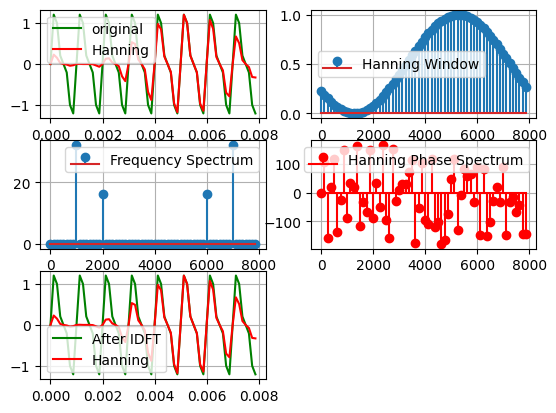

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 64
n = np.arange(N)
fs = 8000
t = n/fs

def xa(t):
    return np.sin(2000*np.pi*t)+0.5*np.sin(4000*np.pi*t+4*np.pi)
def hanning(N):
     return 0.5*(1-np.cos(2*np.pi*np.arange(N)/N-1))

def dft(x):
    N = len(x)
    X = np.zeros(N,dtype=complex)
    for k in range(N):
         for n in range(N):
              X[k]+=x[n]*np.exp(-2j*np.pi*k*n/N)
    return X 

def idft(X):
    N = len(X)
    x = np.zeros(N,dtype=complex)
    for n in range (N):
          for k in range(N):
               x[n]+=X[k]*np.exp(2j*np.pi*k*n/N)
          x[n] /= N
    return x

freq = np.arange(N)*fs/N
x = xa(t)

x_hanning = hanning(N)
hanning_x = x*x_hanning

x_dft = dft(x)
x_hanning_dft = dft(hanning_x)

x_idft = idft(x_dft)
x_idft_hanning = idft(x_hanning_dft)

plt.subplot(3,2,1)
plt.plot(t,x,label="original",color="g")
plt.plot(t,hanning_x,label="Hanning",color="r")
# plt.title("Before DFT")
plt.grid(True)
plt.legend()

plt.subplot(3,2,2)
plt.stem(freq,x_hanning,label="Hanning Window")
# plt.title("Hanning Window")
plt.grid(True)
plt.legend()

plt.subplot(3,2,3)
plt.stem(freq,abs(x_dft),label="Frequency Spectrum")
# plt.title("After DFT")
plt.grid(True)
plt.legend()

plt.subplot(3,2,4)
plt.stem(freq,np.angle(x_hanning_dft,deg=True),label="Hanning Phase Spectrum",linefmt="r",basefmt="r",markerfmt="r")
# plt.title("After DFT")
plt.grid(True)
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,x_idft,label="After IDFT",color="g")
plt.plot(t,x_idft_hanning,label="Hanning",color="r")
# plt.title("Before DFT")
plt.grid(True)
plt.legend()

plt.show()